In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv('/content/Wine dataset.csv')

In [16]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [22]:
scaler.fit(df.drop('class',axis=1))

StandardScaler()

In [24]:
scaled_features = scaler.transform(df.drop('class',axis=1))

In [25]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


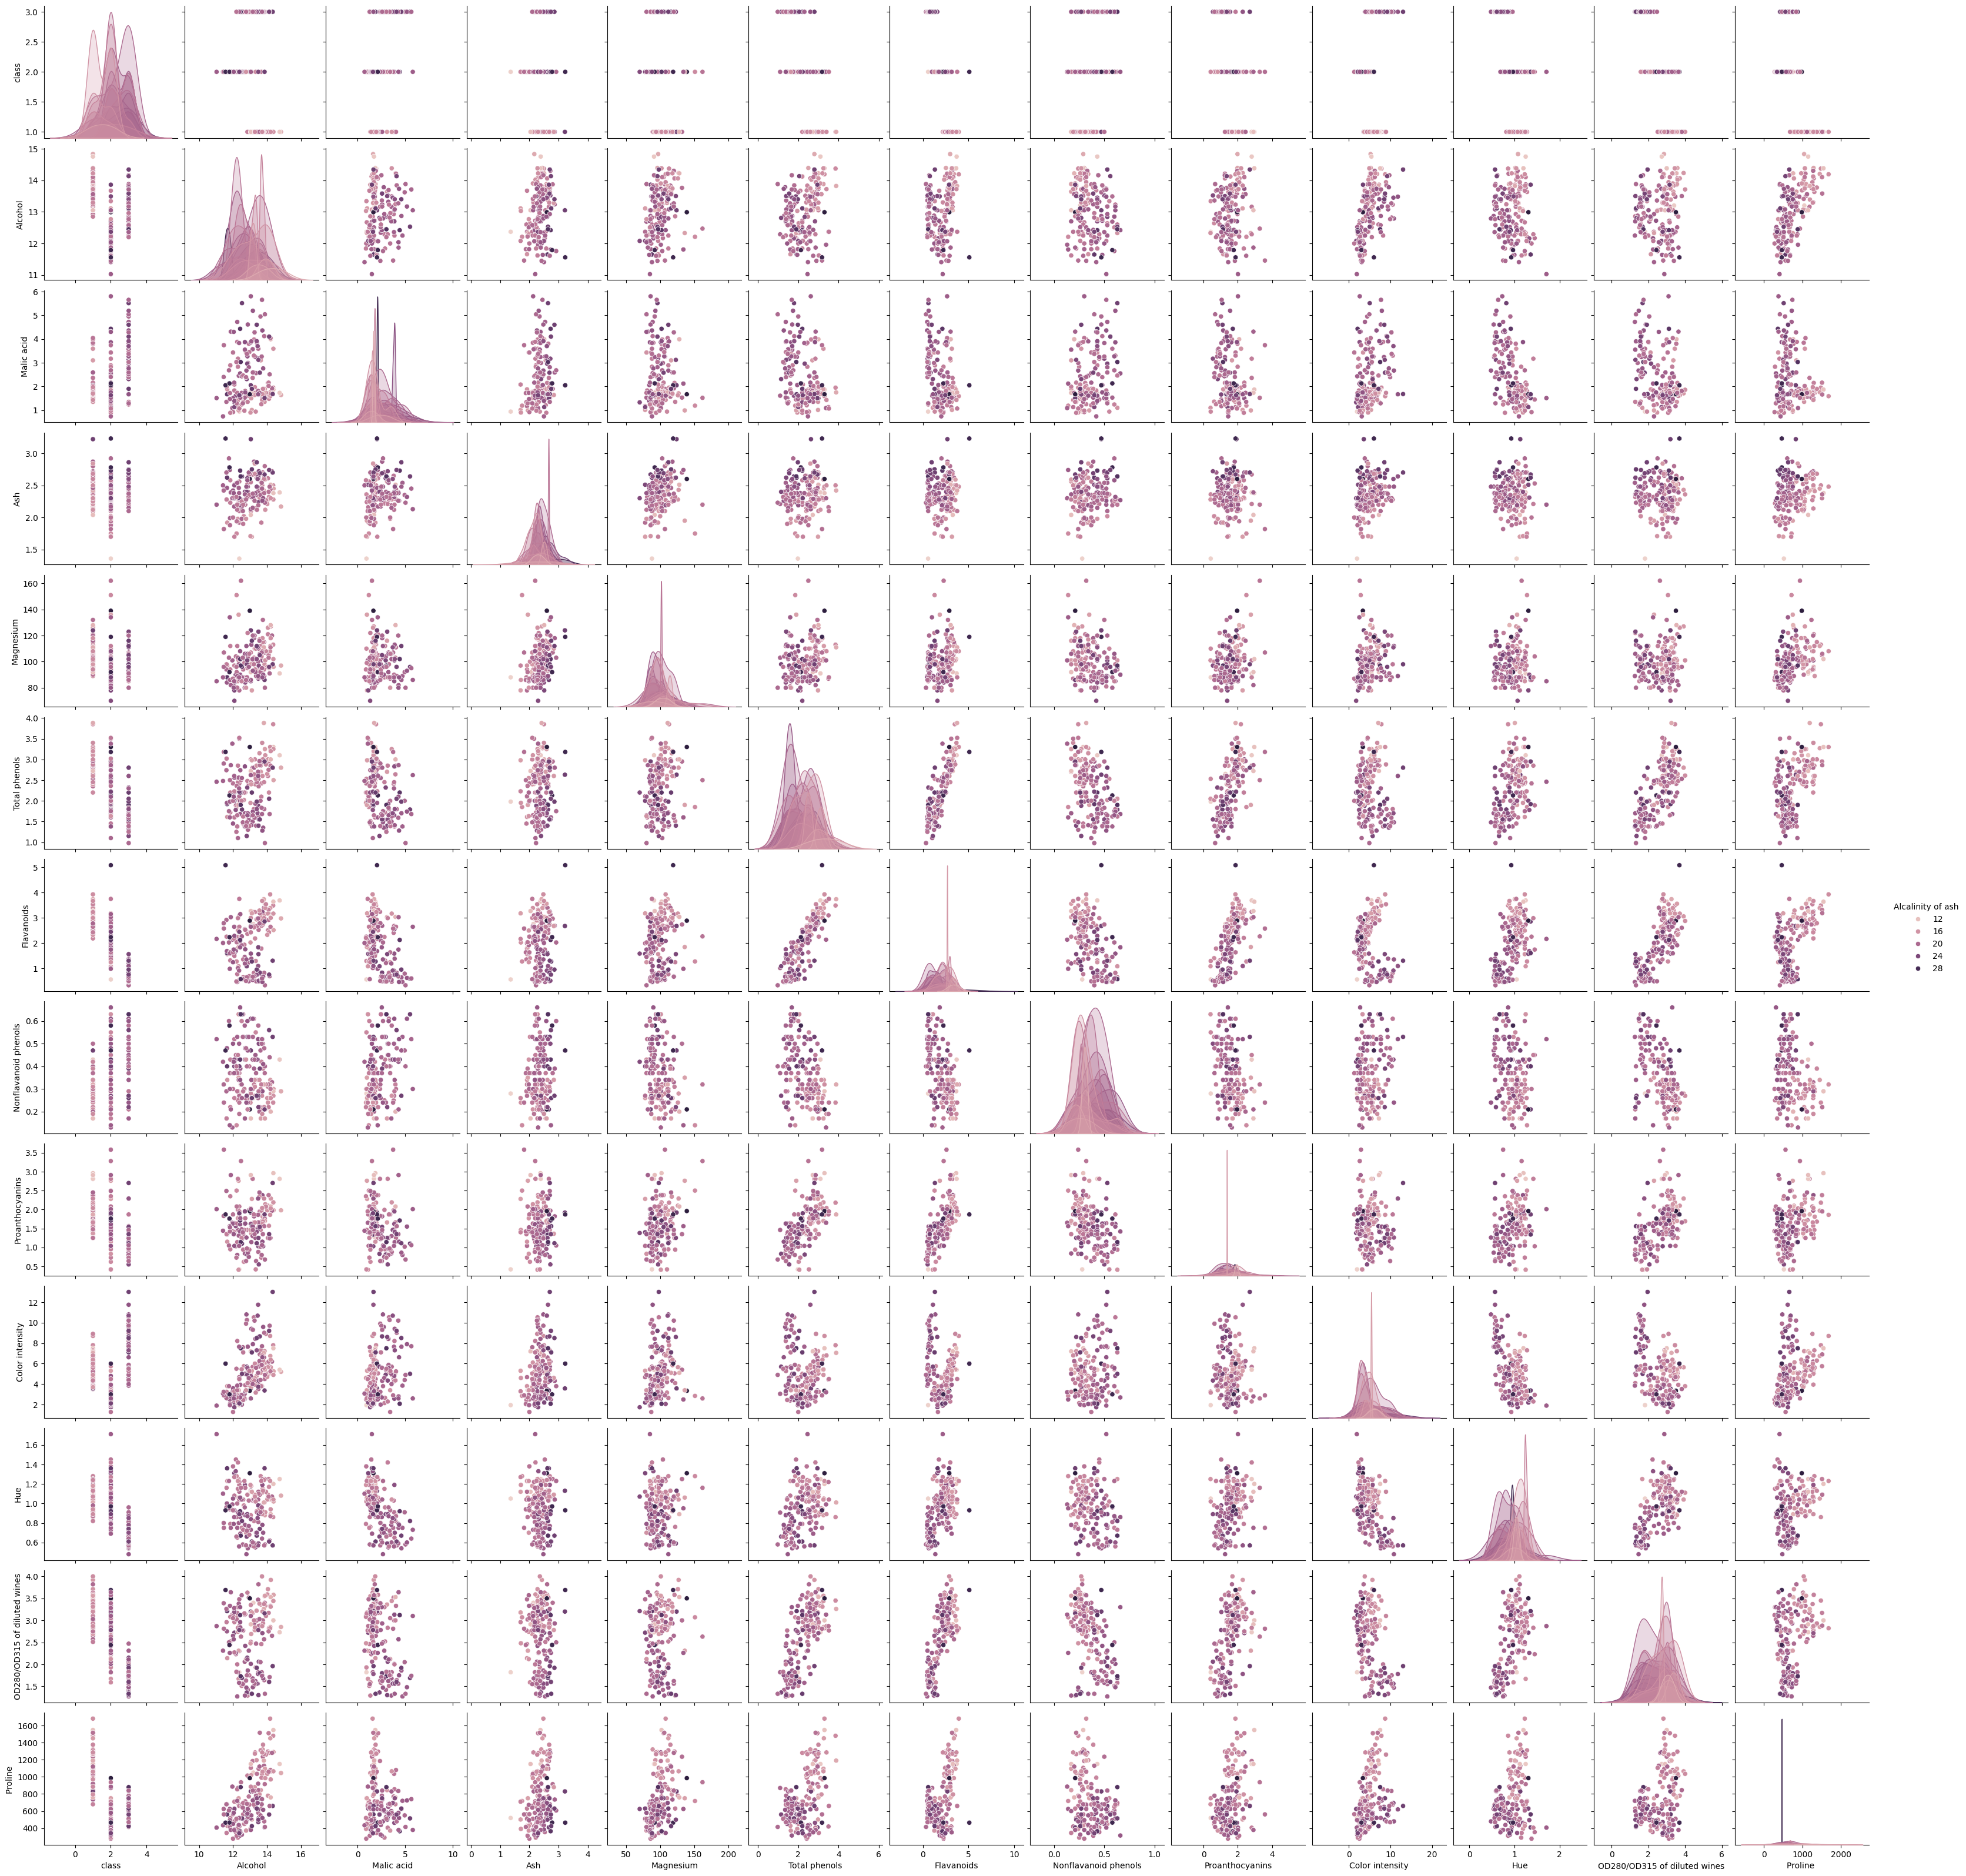

In [26]:
sns.pairplot(df,hue='Alcalinity of ash')

In [27]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df_feat, df['class'], test_size=0.3)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
kmn = KNeighborsClassifier(n_neighbors=1)

In [31]:
kmn.fit(x_train,x_test)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pred = kmn.predict(y_train)

In [36]:
pred = kmn.predict(x_test)

In [37]:
pred = kmn.predict(x_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [41]:
accuracy_rate = []
for i in range(1,66):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['class'],cv=10)
  accuracy_rate.append(score.mean())

In [42]:
error_rate = []
for i in range(1,66):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

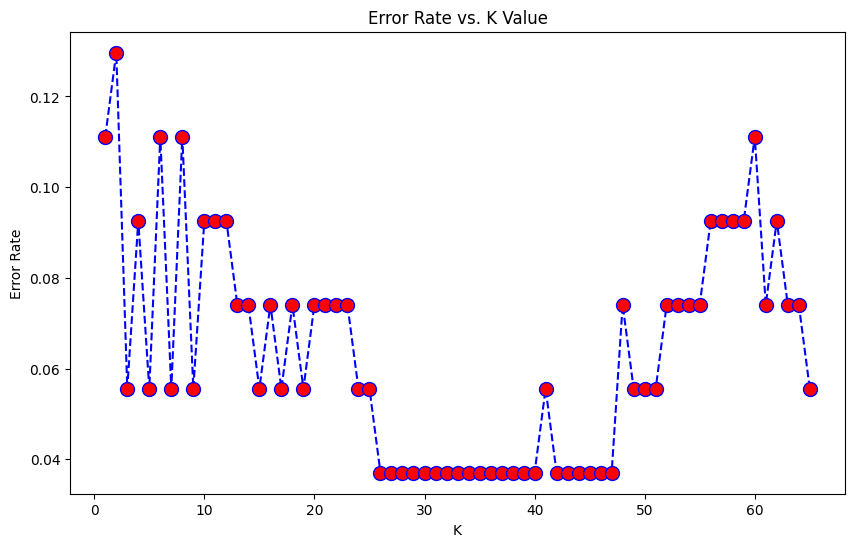

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,66),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[21  0  0]
 [ 3 18  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           1       0.88      1.00      0.93        21
           2       1.00      0.86      0.92        21
           3       1.00      1.00      1.00        12

    accuracy                           0.94        54
   macro avg       0.96      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [45]:
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=33


[[21  0  0]
 [ 2 19  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54

